In [6]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset
import torch
from celeba import get_celeba

import torch.optim as optim
import torch.nn.functional as F
from model import Encoder, Decoder


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
train_loader, test_loader, val_loader = get_celeba(32, "./dataset/")

No. of training imgs: 36000
No. of validation imgs: 9000
No. of testing imgs: 5000


In [9]:
s_test, p_test = test_loader

In [10]:
encoder = Encoder()
decoder = Decoder()

encoder_path = "./1encoder.pt"
decoder_path = "./1decoder.pt"

encoder.load_state_dict(torch.load(encoder_path, map_location = device))
decoder.load_state_dict(torch.load(decoder_path, map_location = device))

<All keys matched successfully>

torch.Size([1, 3, 256, 256]) tensor(-1.) tensor(0.9765)
torch.Size([256, 256, 3])


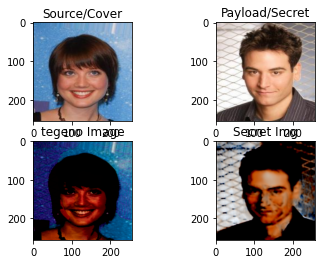

torch.Size([1, 3, 256, 256]) tensor(-0.9451) tensor(1.)
torch.Size([256, 256, 3])


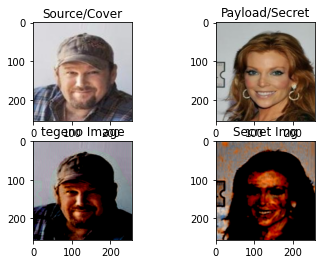

torch.Size([1, 3, 256, 256]) tensor(-1.) tensor(1.)
torch.Size([256, 256, 3])


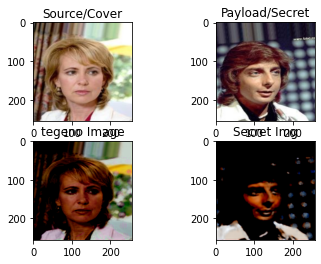

torch.Size([1, 3, 256, 256]) tensor(-1.) tensor(1.)
torch.Size([256, 256, 3])


KeyboardInterrupt: 

In [13]:
for i, (s,p) in enumerate(zip(s_test,p_test)):
    if i < 5:
      s, _ = s  #cover
      p, _ = p  #secret'
      s = s.to(device)
      p = p.to(device)
      print(s.shape, s.min(), s.max())

      stegono_img = encoder(s,p)
      output = decoder(stegono_img)

      s = s[0,:,:,:].permute(1,2,0).cpu()
      p = p[0,:,:,:].permute(1,2,0).cpu()
      stegono_img = stegono_img[0,:,:,:].permute(1,2,0).cpu()
      output = output[0,:,:,:].permute(1,2,0).cpu()
      print(s.shape)
      plt.subplot(221)
      plt.imshow((s+1)/2)
      plt.title("Source/Cover")
      plt.subplot(222)
      plt.imshow((p+1)/2)
      plt.title("Payload/Secret")
      plt.subplot(223)
      st = (stegono_img.detach().numpy())
      plt.imshow((st-st.min())/(st.max()-st.min()))
      plt.title("tegeno Image")
      plt.subplot(224)
      op = output.detach().numpy()
      plt.imshow((op-op.min())/(op.max()-op.min()))
      plt.title("Secret Img")
      plt.show()